In [35]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import swan_vis as swan
import yaml
from snakemake.io import expand
import cerberus
import pyranges as pr
import upsetplot

p = os.path.dirname(os.getcwd())
sys.path.append(p)

from scripts.utils import *
from scripts.vcf_utils import *
from scripts.plotting import *
from scripts.sm_utils import *

In [36]:
config = load_config()
od = '../'

def proc_cfg(entry, od):
    entry = entry.replace('../../', '')
    entry = od+entry
    return entry

In [49]:
temp = pd.read_csv('241029_novel_exon_table.tsv', sep='\t')

## Characterize the number of transcritps and genes each exon is in

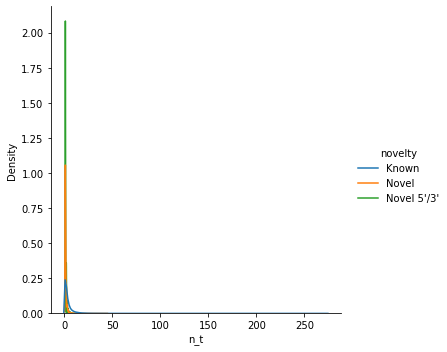

In [53]:
temp2 = temp[['eid', 'novelty', 'transcript_id']].groupby(['eid', 'novelty']).nunique().rename({'transcript_id':'n_t'}, axis=1).reset_index()
ax = sns.displot(temp2, x='n_t', hue='novelty', kind='kde', common_norm=False)
# clean_figure(ax)

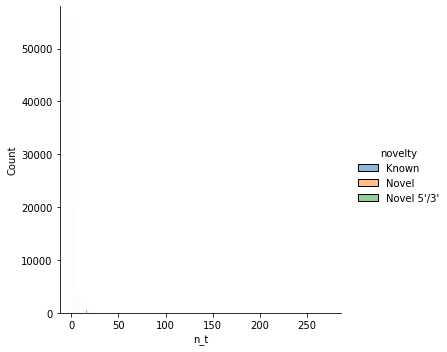

In [54]:
ax = sns.displot(temp2, x='n_t', hue='novelty')

In [55]:
temp2.n_t.max()

273

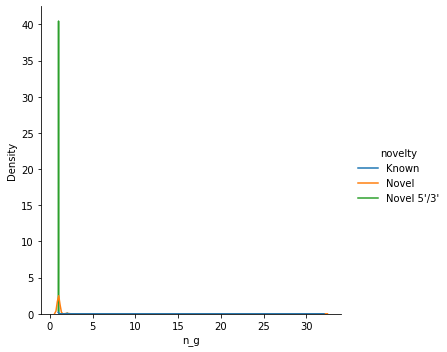

In [56]:
temp2 = temp[['eid', 'novelty', 'gene_id']].groupby(['eid', 'novelty']).nunique().rename({'gene_id':'n_g'}, axis=1).reset_index()
ax = sns.displot(temp2, x='n_g', hue='novelty', kind='kde', common_norm=False)
# clean_figure(ax)

## How many novel exons are there per gene biotype?


<AxesSubplot:xlabel='associated_gene_biotype', ylabel='eid'>

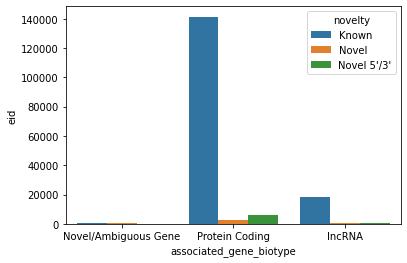

In [57]:
temp2 = temp[['eid', 'associated_gene_biotype', 'novelty']].groupby(['novelty', 'associated_gene_biotype']).nunique()
temp2 = temp2.reset_index()
sns.barplot(temp2, y='eid', x='associated_gene_biotype', hue='novelty')

<AxesSubplot:xlabel='associated_gene_biotype', ylabel='eid'>

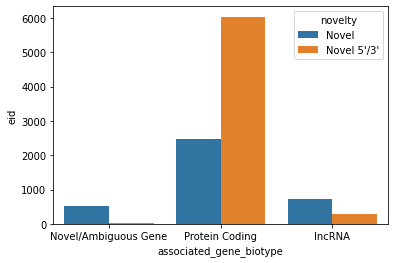

In [59]:
# just novel
temp2 = temp[['eid', 'associated_gene_biotype', 'novelty']].groupby(['novelty', 'associated_gene_biotype']).nunique()
temp2 = temp2.reset_index()
temp2 = temp2.loc[temp2.novelty.isin(['Novel', "Novel 5'/3'"])]
sns.barplot(temp2, y='eid', x='associated_gene_biotype', hue='novelty')

In [64]:
# temp.loc[temp.structural_category == 'Intergenic'].head()
temp.loc[(temp['associated_gene_biotype'] == 'Novel/Ambiguous Gene')].structural_category.unique() #|\
temp.loc[temp['associated_gene_biotype'].isnull()].structural_category.unique()

array(['Fusion', 'Intergenic', 'FSM', 'Genic'], dtype=object)

<AxesSubplot:xlabel='structural_category', ylabel='eid'>

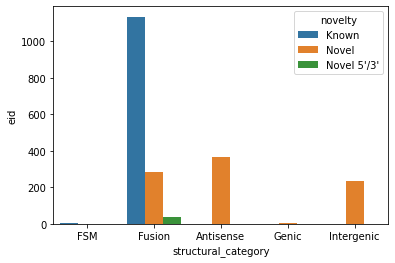

In [45]:
temp2 = temp.loc[(temp['associated_gene_biotype'] == 'Novel/Ambiguous Gene')|\
                 (temp['associated_gene_biotype'].isnull())]
temp2 = temp2[['eid', 'structural_category', 'novelty']].groupby(['novelty', 'structural_category']).nunique()
temp2 = temp2.reset_index()
sns.barplot(temp2, y='eid', x='structural_category', hue='novelty')

In [46]:
thing = temp.loc[(temp.structural_category=='FSM')&\
         (temp.associated_gene_biotype.isnull())].transcript_id.unique()
len(thing)

2

In [47]:
thing

array(['transcript_367606', 'transcript_372937'], dtype=object)

In [48]:
temp.loc[temp.transcript_id=='transcript_367606']

,Unnamed: 0,eid,novelty,transcript_id,gene_id,associated_gene,associated_gene_biotype,isoform,structural_category,Chromosome,Strand,Start,End,temp
7265646,7265646,chr8_-_90980362_90980461_,Known,transcript_367606,ENSG00000253250.3,NaN,NaN,transcript_367606,FSM,chr8,-,90980362,90980461,NaN
7265647,7265647,chr8_-_90978578_90978652_,Known,transcript_367606,ENSG00000253250.3,NaN,NaN,transcript_367606,FSM,chr8,-,90978578,90978652,NaN
7265648,7265648,chr8_-_90971065_90971141_,Known,transcript_367606,ENSG00000253250.3,NaN,NaN,transcript_367606,FSM,chr8,-,90971065,90971141,NaN
7265649,7265649,chr8_-_90960741_90960848_,Known,transcript_367606,ENSG00000253250.3,NaN,NaN,transcript_367606,FSM,chr8,-,90960741,90960848,NaN
